In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## PREDICTING HEART DISEASE 

In [2]:
df = pd.read_csv('C:/Users/DELL/Downloads/Heart_disease_statlog.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


(270, 14)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
cp,270.0,2.174074,0.950090,0.0,2.0,2.0,3.0,3.0
trestbps,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
chol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
fbs,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
restecg,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
thalach,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
exang,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
oldpeak,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


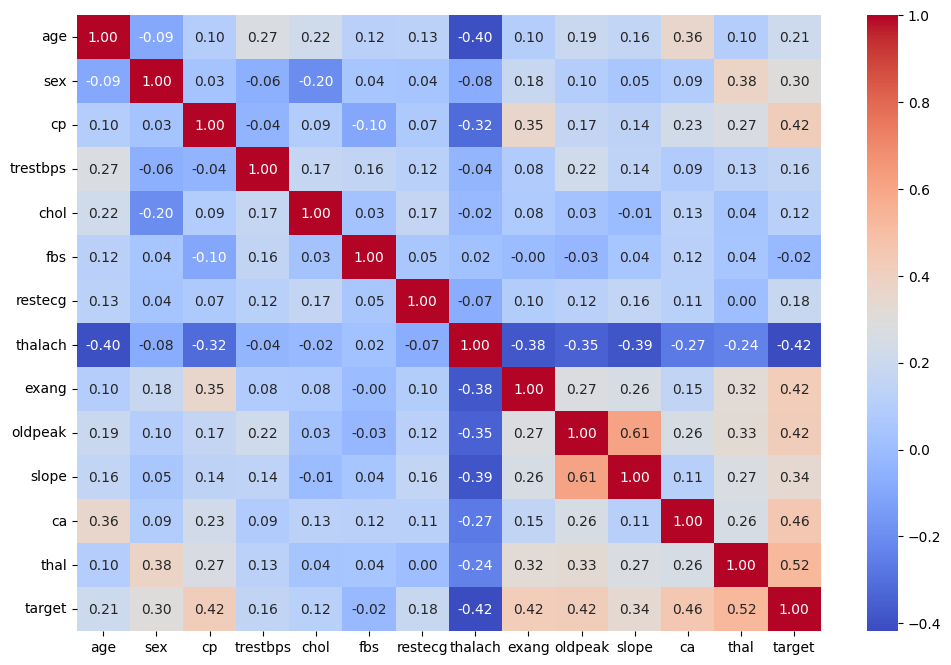

In [5]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt = '.2f', cmap = 'coolwarm')
plt.show()

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


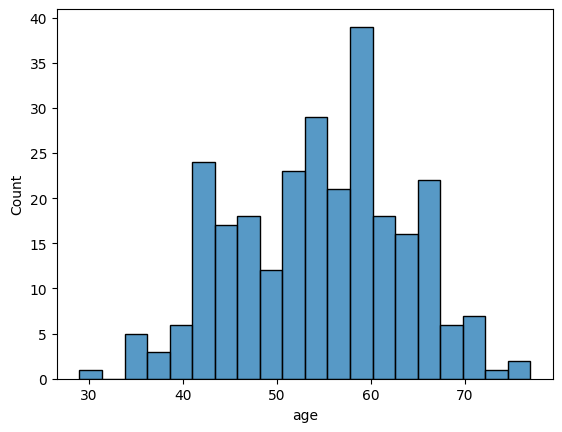

In [7]:
sns.histplot(df['age'], bins=20)
plt.show()

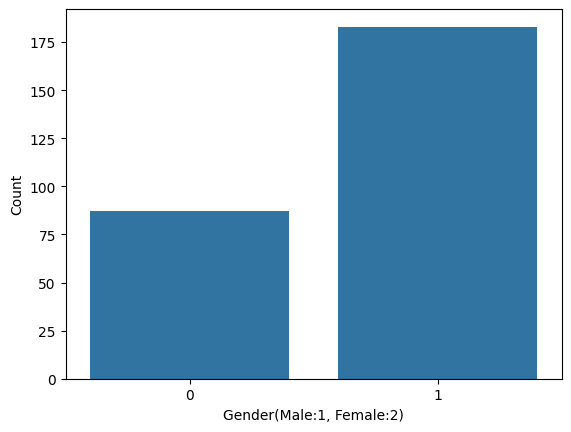

In [8]:
sns.countplot(x = 'sex', data = df)
plt.xlabel('Gender(Male:1, Female:2)')
plt.ylabel('Count')


plt.show()

In [9]:
df['sex'].value_counts()

sex
1    183
0     87
Name: count, dtype: int64

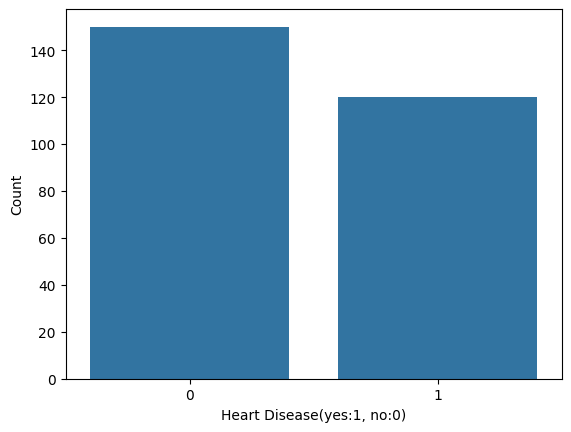

In [10]:
sns.countplot(x = 'target', data = df)
plt.xlabel('Heart Disease(yes:1, no:0)')
plt.ylabel('Count')
plt.show()

In [22]:
print(df['target'].value_counts())

target
0    150
1    120
Name: count, dtype: int64


In [ ]:
## Now we model the data
#ENCODING CATEGORICAL VARIABLES
df = pd.get_dummies(df, drop_first=True)
# FEATURE SCALING
# Now we scale the features by dropping 'target' cause its the variable  we're trying to predict, the we scale the rest so that it feature  contribute equaully to the model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature = df.drop('target', axis = 1)
scaled_feature = scaler.fit_transform(feature)
#The result, scaled_features, is a NumPy array where each feature has been standardized (mean of 0 and standard deviation of 1).




In [16]:
# TRAIN SPLIT TEST
# Now we train split test
from sklearn.model_selection import train_test_split
x = scaled_feature
y = df['target']
x_train, x_test, y_train,y_test = train_test_split(x,y , test_size=0.2, random_state=42)


In [ ]:
# Now we build a model
# For binary classification problems, logistic regression is commonly used
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Evaluating model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[32  1]
 [ 3 18]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.95      0.86      0.90        21

    accuracy                           0.93        54
   macro avg       0.93      0.91      0.92        54
weighted avg       0.93      0.93      0.93        54



In [ ]:
#RESULT INTERPRETATION
'''
Classification Report
The classification report includes several metrics:

Precision:
For Class 0 (No Heart Disease): 0.91
For Class 1 (Heart Disease): 0.95
Interpretation: Precision measures the accuracy of the positive predictions. A precision of 0.91 means that when the model predicts no heart disease, it is correct 91% of the time. Similarly, a precision of 0.95 means that when it predicts heart disease, it is correct 95% of the time.
Recall:
For Class 0: 0.97
For Class 1: 0.86
Interpretation: Recall measures the model's ability to find all the relevant cases. A recall of 0.97 for class 0 means that the model correctly identifies 97% of the actual non-heart disease cases. For class 1, a recall of 0.86 means that it identifies 86% of patients with heart disease.
F1-Score:
For Class 0: 0.94
For Class 1: 0.90
Interpretation: The F1-score is the harmonic mean of precision and recall. It provides a balance between the two metrics. Higher F1-scores indicate better performance. The scores suggest that the model performs well for both classes.
Support:
For Class 0: 33
For Class 1: 21
Interpretation: Support is the number of actual occurrences of the class in the specified dataset. There are 33 actual cases of no heart disease and 21 actual cases of heart disease in the test set.
Overall Accuracy
Accuracy: 0.93
Interpretation: The overall accuracy of the model is 93%, indicating that the model correctly predicted the outcome for 93% of the test cases.
Averages
Macro Average:
Precision: 0.93
Recall: 0.91
F1-Score: 0.92
Interpretation: The macro average treats all classes equally and shows that the overall model performance is strong.
Weighted Average:
Precision: 0.93
Recall: 0.93
F1-Score: 0.93
Interpretation: The weighted average accounts for the support of each class, providing a more balanced view of model performance across different class sizes.
'''

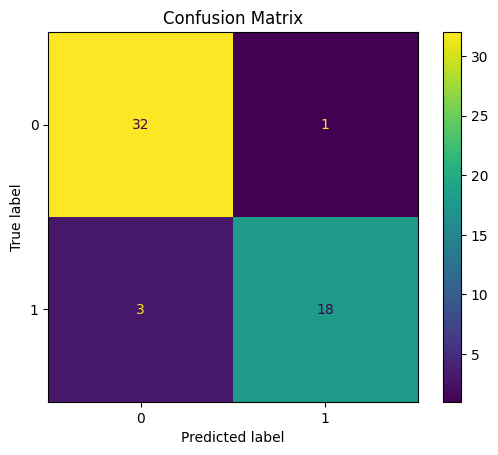

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
plt.title('Confusion Matrix')
plt.show()